In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

# L1 regularisation
lasso_regression_model = Lasso(alpha=0.1)
lasso_regression_model.fit(X, y)

# L2 regularisation
ridge_regression_model = Ridge(alpha=0.1)
ridge_regression_model.fit(X, y)

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

def create_fake_data():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.3, random_state=20)
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_val = ss.transform(X_val)
    return X_train, y_train, X_val, y_val


def get_loss_curves(model):
    X_train, y_train, X_val, y_val = create_fake_data()

    train_errors = []
    val_errors = []
    n_epochs = 50
    
    for epoch in range(n_epochs):
        
        model.fit(X_train, y_train)
        
        y_train_predict = model.predict(X_train)
        train_errors.append(mean_squared_error(y_train, y_train_predict))

        y_val_predict = model.predict(X_val)
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    best_epoch = np.argmin(val_errors)
    best_val_rmse = np.sqrt(val_errors[best_epoch])

    plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
    plt.legend(loc="upper right", fontsize=14)
    plt.ylim(1.3, 2.5)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()

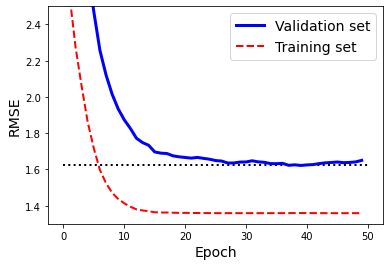

In [57]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(
    max_iter=1, # only take one optimisation step
    tol=-np.infty, # only stop when the change in loss is less than negative infinity (i.e. never)
    warm_start=True, # start off from the previous param values
)

get_loss_curves(sgd_regressor)
